<a href="https://colab.research.google.com/github/cpython-projects/da_2603/blob/main/lesson_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔷 ABC-анализ

## Зачем делать ABC-анализ?

ABC-анализ — это **простой и мощный способ расставить приоритеты**. Он помогает ответить на вопрос:

> Какие товары приносят наибольшую часть выручки, и где стоит сосредоточить усилия?

Мы почти всегда сталкиваемся с тем, что:

* **20% товаров** приносят **80% выручки** (принцип Парето),
* А большинство товаров — создают **мизерную долю дохода**, но требуют ресурсов (хранение, логистика, маркетинг).

---

## Применение

* управлении запасами (логистика),
* оптимизации ассортимента (retail),
* анализе выручки (финансы),
* управлении SKU (Stock Keeping Unit/товарная позиция) (продуктовая аналитика).

---

## Основная идея

Разделить товары по **вкладу в совокупную выручку**:

| Класс | Выручка | Примерный % товаров | Цель управления           |
| ----- | ------- | ------------------- | ------------------------- |
| A     | 70–80%  | 10–20%              | Максимальный контроль     |
| B     | 15–25%  | \~30%               | Поиск улучшений           |
| C     | ≤ 5%    | 50–60%              | Автоматизация, сокращение |

---

## Этапы ABC-анализа

1. **Подготовка данных**: выручка по каждому товару (или SKU).
2. **Агрегация** (если нужно): группировка по ID, сумма выручки.
3. **Сортировка** по убыванию выручки.
4. **Накопление** доли от общего объема.
5. **Классификация** по порогам: A / B / C.
6. **Интерпретация и действия**.

## Пример

In [1]:
import pandas as pd

data = {
    'item_id': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'],
    'total_sales_value': [1000, 800, 500, 200, 150, 100, 50]
}

df = pd.DataFrame(data)
df

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,50


In [2]:
# Шаг 1. Группировка по товарам (если дублируются)

df_grouped = df.groupby('item_id', as_index=False).agg({
    'total_sales_value': 'sum'
})

df_grouped

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,50


In [3]:
# Шаг 2. Сортировка по убыванию
df_sorted = df.sort_values('total_sales_value', ascending=False).reset_index(drop=True)

df_sorted

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,50


In [4]:
# Шаг 3. Накопление и процент

df_sorted['cumulative_sales'] = df_sorted['total_sales_value'].cumsum()
df_sorted

,item_id,total_sales_value,cumulative_sales
0,A1,1000,1000
1,A2,800,1800
2,A3,500,2300
3,A4,200,2500
4,A5,150,2650
5,A6,100,2750
6,A7,50,2800


In [5]:
total_sales = df_sorted['total_sales_value'].sum()
df_sorted['cumulative_percent'] = df_sorted['cumulative_sales'] / total_sales
df_sorted

,item_id,total_sales_value,cumulative_sales,cumulative_percent
0,A1,1000,1000,0.357143
1,A2,800,1800,0.642857
2,A3,500,2300,0.821429
3,A4,200,2500,0.892857
4,A5,150,2650,0.946429
5,A6,100,2750,0.982143
6,A7,50,2800,1.000000


In [6]:
# Шаг 4. Присвоение класса

def abc_class(p):
    if p <= 0.8:
        return 'A'
    elif p <= 0.95:
        return 'B'
    else:
        return 'C'

df_sorted['ABC_class'] = df_sorted['cumulative_percent'].apply(abc_class)
df_sorted

,item_id,total_sales_value,cumulative_sales,cumulative_percent,ABC_class
0,A1,1000,1000,0.357143,A
1,A2,800,1800,0.642857,A
2,A3,500,2300,0.821429,B
3,A4,200,2500,0.892857,B
4,A5,150,2650,0.946429,B
5,A6,100,2750,0.982143,C
6,A7,50,2800,1.000000,C


## Что делать после ABC-классификации?

### Класс A (ключевые)

* Максимум внимания: поставки, склад, продвижение.
* Следить за остатками, рекламой, скидками.
* Часто анализировать динамику.

### Класс B (средняя значимость)

* Оптимизировать: условия закупки, поставщиков.
* Есть потенциал роста — подумать о маркетинге.

### Класс C (низкоприоритетные)

* Минимизировать запасы.
* Объединять SKU, удалять неэффективные.
* Возможно — перевести на автоматический контроль.

# 🔷 XYZ-анализ

## Зачем делать XYZ-анализ?

Если ABC-анализ показывает, **что важно по выручке**, то XYZ-анализ показывает:

> Насколько **стабилен спрос** на товар?

Вы можете иметь товар с высокой выручкой, но если он продаётся скачкообразно и нестабильно — с ним нужно обращаться осторожно (риск остатков, дефицита, списаний).

---

## Основная идея

Оценить **предсказуемость спроса** по коэффициенту вариации.  
*Коэффициент вариации* — это относительная мера разброса данных, которая показывает, насколько сильно варьируются значения относительно их среднего.

| Класс | Стабильность спроса     | Интерпретация                       |
| ----- | ----------------------- | ----------------------------------- |
| X     | Высокая стабильность    | Спрос почти не меняется             |
| Y     | Средняя предсказуемость | Есть колебания, но в пределах нормы |
| Z     | Низкая стабильность     | Хаотичный, сезонный или случайный   |

---

## Как измеряется?

Через **коэффициент вариации (CV)**:

$$
\text{CV} = \frac{\text{Стандартное отклонение}}{\text{Среднее значение}}
$$

---

## Этапы XYZ-анализа

1. Подготовка данных: продажи по периодам (например, по месяцам).
2. Расчёт среднего и стандартного отклонения по каждому товару.
3. Расчёт коэффициента вариации (CV).
4. Классификация на X/Y/Z.
5. Интерпретация и действия.

## Пример

In [7]:
data = {
    'item_id': ['A1', 'A2', 'A3', 'A4', 'A5'],
    'jan': [100, 120, 90, 200, 10],
    'feb': [100, 80, 100, 250, 30],
    'mar': [100, 110, 105, 50, 90],
    'apr': [100, 95, 95, 300, 70]
}

df = pd.DataFrame(data)
df

,item_id,jan,feb,mar,apr
0,A1,100,100,100,100
1,A2,120,80,110,95
2,A3,90,100,105,95
3,A4,200,250,50,300
4,A5,10,30,90,70


In [8]:
# Шаг 1. Расчёт среднего и стандартного отклонения

# Считаем среднее и стандартное отклонение по месяцам
df['mean_sales'] = df[['jan', 'feb', 'mar', 'apr']].mean(axis=1)
df['std_sales'] = df[['jan', 'feb', 'mar', 'apr']].std(axis=1)
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales
0,A1,100,100,100,100,100.00,0.000000
1,A2,120,80,110,95,101.25,17.500000
2,A3,90,100,105,95,97.50,6.454972
3,A4,200,250,50,300,200.00,108.012345
4,A5,10,30,90,70,50.00,36.514837


In [9]:
# Шаг 2. Коэффициент вариации

df['cv_percent'] = (df['std_sales'] / df['mean_sales']) * 100
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales,cv_percent
0,A1,100,100,100,100,100.00,0.000000,0.000000
1,A2,120,80,110,95,101.25,17.500000,17.283951
2,A3,90,100,105,95,97.50,6.454972,6.620484
3,A4,200,250,50,300,200.00,108.012345,54.006172
4,A5,10,30,90,70,50.00,36.514837,73.029674


In [10]:
# Шаг 3. Классификация по порогам

def classify_xyz(cv):
    if cv <= 25:
        return 'X'
    elif cv <= 50:
        return 'Y'
    else:
        return 'Z'

df['xyz_class'] = df['cv_percent'].apply(classify_xyz)
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales,cv_percent,xyz_class
0,A1,100,100,100,100,100.00,0.000000,0.000000,X
1,A2,120,80,110,95,101.25,17.500000,17.283951,X
2,A3,90,100,105,95,97.50,6.454972,6.620484,X
3,A4,200,250,50,300,200.00,108.012345,54.006172,Z
4,A5,10,30,90,70,50.00,36.514837,73.029674,Z


## Как интерпретировать?

| Класс | Что это значит?                              | Что делать?                                             |
| ----- | -------------------------------------------- | ------------------------------------------------------- |
| X     | Спрос стабилен, легко прогнозировать         | Планировать точно, держать в постоянном наличии         |
| Y     | Средняя предсказуемость, умеренные колебания | Подстраиваться под тренды, учитывать сезонность         |
| Z     | Нестабильный, хаотичный спрос                | Минимальные запасы, избегать автоматического пополнения |

# 🔷 ABC+XYZ матрица

## Комбинация ABC и XYZ: матрица 3×3

Объединяя оба анализа, получаем **матрицу 9 категорий товаров**:

|       | **X (стабильный)** | **Y (умеренный)** | **Z (хаотичный)** |
| ----- | ------------------ | ----------------- | ----------------- |
| **A** | AX                 | AY                | AZ                |
| **B** | BX                 | BY                | BZ                |
| **C** | CX                 | CY                | CZ                |

---

## Интерпретация ячеек ABC+XYZ

### 1. **AX — стратегические товары**

* Высокая ценность и стабильный спрос.
* Постоянное наличие на складе.
* Приоритетное управление.

---

### 2. **AY — важные, но с колебаниями**

* Дают большой оборот, но спрос нестабилен.
* Нужен регулярный анализ спроса и гибкие закупки.

---

### 3. **AZ — важные, но непредсказуемые**

* Высокий доход, но спрос хаотичен.
* Риски переизбытка/дефицита.
* Лучше закупать по факту, по заказам.

---

### 4. **BX — средняя ценность, стабильный спрос**

* Хорошо прогнозируются.
* Можно закупать по плану.
* Уровень контроля чуть ниже, чем у AX.

---

### 5. **BY — умеренные по значимости и стабильности**

* Стандартная стратегия управления запасами.
* Мониторинг, но не приоритет.

---

### 6. **BZ — средняя важность, хаотичный спрос**

* Желательно сократить склад или перейти на заказ под клиента.

---

### 7. **CX — дешёвые, но стабильные**

* Можно закупать большими партиями.
* Подходят для автоматического пополнения.

---

### 8. **CY — дешёвые, умеренно нестабильные**

* Возможно иметь запас, но осторожно.
* Баланс между затратами и рисками.

---

### 9. **CZ — дешёвые и хаотичные**

* Кандидаты на выведение из ассортимента.
* Закупка по факту или исключение.

---

## Как использовать на практике?

* **AX, BX** — автоматизация закупок, регулярный пересмотр.
* **AZ, BZ, CZ** — снижение складских остатков, закупка по заказу.
* **CY, CZ** — кандидаты на удаление/замену.
* **ABC** — формирует приоритет по важности.
* **XYZ** — формирует приоритет по прогнозируемости.

# 🔷 Пример

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/da_2603/refs/heads/main/abc_xyz_dataset.csv')
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [13]:
# Сортировка по убыванию выручки
df_sorted = df.sort_values(by='Total_Sales_Value', ascending=False).reset_index(drop=True)

# Доля от общей выручки
df_sorted['Cumulative_Sales'] = df_sorted['Total_Sales_Value'].cumsum()
total_sales = df_sorted['Total_Sales_Value'].sum()
df_sorted['Cumulative_Percent'] = df_sorted['Cumulative_Sales'] / total_sales

# Классификация
def abc_class(row):
    if row['Cumulative_Percent'] <= 0.8:
        return 'A'
    elif row['Cumulative_Percent'] <= 0.95:
        return 'B'
    else:
        return 'C'

df_sorted['ABC_Class'] = df_sorted.apply(abc_class, axis=1)
df_sorted

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,5127,4840,4774,5023,59462,1000,59462000,59462000,0.055453,A
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,3936,3646,3959,4208,47606,1000,47606000,107068000,0.099850,A
2,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,3329,3168,...,3309,2997,2781,2859,37136,1000,37136000,144204000,0.134483,A
3,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,5361,5504,...,4631,4959,4867,4903,59609,500,29804500,174008500,0.162278,A
4,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,4889,4754,...,4477,4544,4553,4982,56862,500,28431000,202439500,0.188792,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,65,60,...,59,61,75,65,756,2,1512,1072282530,0.999995,C
996,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,69,60,...,60,76,56,65,728,2,1456,1072283986,0.999996,C
997,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,54,58,...,62,48,54,60,698,2,1396,1072285382,0.999998,C
998,ITM_569,Worry Because,Toys,50,65,61,60,51,55,48,...,54,55,50,45,645,2,1290,1072286672,0.999999,C


In [14]:
df_sorted['ABC_Class'].value_counts()

,count
ABC_Class,
C,743
B,170
A,87


In [15]:
# Расчёт CV по строкам
monthly_columns = [col for col in df.columns if '_Demand' in col and len(col) == 10]

df_sorted['Mean_Demand'] = df[monthly_columns].mean(axis=1)
df_sorted['Std_Demand'] = df[monthly_columns].std(axis=1)
df_sorted['CV_Demand'] = df_sorted['Std_Demand'] / df_sorted['Mean_Demand']

# Классификация по XYZ
def xyz_class(cv):
    if cv <= 0.1:
        return 'X'
    elif cv <= 0.25:
        return 'Y'
    else:
        return 'Z'

df_sorted['XYZ_Class'] = df_sorted['CV_Demand'].apply(xyz_class)
df_sorted

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class,Mean_Demand,Std_Demand,CV_Demand,XYZ_Class
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,59462,1000,59462000,59462000,0.055453,A,4481.333333,257.272524,0.057410,X
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,47606,1000,47606000,107068000,0.099850,A,4787.750000,182.115410,0.038038,X
2,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,3329,3168,...,37136,1000,37136000,144204000,0.134483,A,131.333333,127.696610,0.972309,Z
3,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,5361,5504,...,59609,500,29804500,174008500,0.162278,A,942.083333,155.640879,0.165209,Y
4,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,4889,4754,...,56862,500,28431000,202439500,0.188792,A,1652.750000,193.900689,0.117320,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,65,60,...,756,2,1512,1072282530,0.999995,C,4104.583333,171.768056,0.041848,X
996,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,69,60,...,728,2,1456,1072283986,0.999996,C,3307.416667,221.233508,0.066890,X
997,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,54,58,...,698,2,1396,1072285382,0.999998,C,162.416667,118.861614,0.731831,Z
998,ITM_569,Worry Because,Toys,50,65,61,60,51,55,48,...,645,2,1290,1072286672,0.999999,C,342.583333,14.304852,0.041756,X


In [16]:
df_sorted['XYZ_Class'].value_counts()

,count
XYZ_Class,
X,637
Y,216
Z,147


In [17]:
# Объединение
df_sorted['ABC_XYZ'] = df_sorted['ABC_Class'] + '/' + df_sorted['XYZ_Class']
df_sorted

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class,Mean_Demand,Std_Demand,CV_Demand,XYZ_Class,ABC_XYZ
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,1000,59462000,59462000,0.055453,A,4481.333333,257.272524,0.057410,X,A/X
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,1000,47606000,107068000,0.099850,A,4787.750000,182.115410,0.038038,X,A/X
2,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,3329,3168,...,1000,37136000,144204000,0.134483,A,131.333333,127.696610,0.972309,Z,A/Z
3,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,5361,5504,...,500,29804500,174008500,0.162278,A,942.083333,155.640879,0.165209,Y,A/Y
4,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,4889,4754,...,500,28431000,202439500,0.188792,A,1652.750000,193.900689,0.117320,Y,A/Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,65,60,...,2,1512,1072282530,0.999995,C,4104.583333,171.768056,0.041848,X,C/X
996,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,69,60,...,2,1456,1072283986,0.999996,C,3307.416667,221.233508,0.066890,X,C/X
997,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,54,58,...,2,1396,1072285382,0.999998,C,162.416667,118.861614,0.731831,Z,C/Z
998,ITM_569,Worry Because,Toys,50,65,61,60,51,55,48,...,2,1290,1072286672,0.999999,C,342.583333,14.304852,0.041756,X,C/X


In [21]:
# A/X — самые важные и стабильные
# приоритет для автоматизации закупок
# стабильная логистика, максимум внимания

df_AX = df_sorted[df_sorted['ABC_XYZ'] == 'A/X']
df_AX

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Percent,ABC_Class,Mean_Demand,Std_Demand,CV_Demand,XYZ_Class,ABC_XYZ
0,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,1000,59462000,59462000,0.055453,A,4481.333333,257.272524,0.057410,X,A/X
1,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,1000,47606000,107068000,0.099850,A,4787.750000,182.115410,0.038038,X,A/X
7,ITM_852,Material Leg,Grocery,4778,4604,4416,3917,4129,4293,4360,...,500,26322000,282784000,0.263720,A,295.250000,14.820900,0.050198,X,A/X
10,ITM_100,Military Understand,Grocery,3898,3208,3882,3726,3453,3710,3201,...,500,21931000,351568500,0.327868,A,3357.916667,202.895163,0.060423,X,A/X
11,ITM_581,Manage Into,Grocery,3310,3475,3735,3704,3392,3425,3432,...,500,20372500,371941000,0.346867,A,3464.166667,197.793664,0.057097,X,A/X
12,ITM_011,Water Hair,Grocery,3481,3407,3105,3339,3384,3175,3524,...,500,20147500,392088500,0.365656,A,304.083333,19.956582,0.065629,X,A/X
14,ITM_721,Perform Operation,Grocery,2918,3336,3051,2947,3000,3101,3220,...,500,18202000,430012500,0.401023,A,484.333333,17.752507,0.036653,X,A/X
15,ITM_648,Measure Begin,Grocery,2933,2953,3100,2795,2641,2754,2797,...,500,17450000,447462500,0.417297,A,2747.416667,241.466150,0.087888,X,A/X
16,ITM_302,Southern Away,Grocery,2632,2926,2619,2677,2806,2461,2559,...,500,15911500,463374000,0.432136,A,162.250000,12.461760,0.076806,X,A/X
18,ITM_218,Themselves Like,Grocery,2269,2740,2283,2554,2599,2716,2811,...,500,14959000,493679500,0.460398,A,3807.000000,240.326293,0.063127,X,A/X


In [22]:
df.columns.to_list()

['Item_ID',
 'Item_Name',
 'Category',
 'Jan_Demand',
 'Feb_Demand',
 'Mar_Demand',
 'Apr_Demand',
 'May_Demand',
 'Jun_Demand',
 'Jul_Demand',
 'Aug_Demand',
 'Sep_Demand',
 'Oct_Demand',
 'Nov_Demand',
 'Dec_Demand',
 'Total_Annual_Units',
 'Price_Per_Unit',
 'Total_Sales_Value']

In [26]:
# Сводная таблица: количество товаров в каждой группе ABC/XYZ
heatmap_data = df_sorted.pivot_table(
    index='ABC_Class',
    columns='XYZ_Class',
    aggfunc='size',
    fill_value=0
)
heatmap_data

XYZ_Class,X,Y,Z
ABC_Class,,,
A,42,28,17
B,111,30,29
C,484,158,101


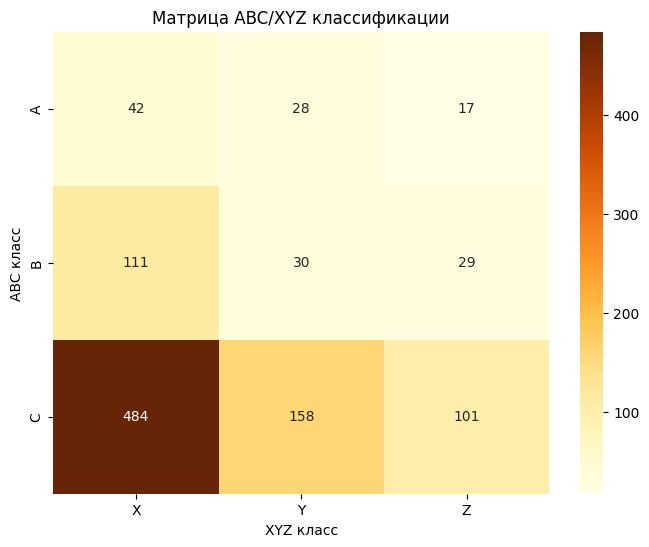

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Матрица ABC/XYZ классификации')
plt.ylabel('ABC класс')
plt.xlabel('XYZ класс')
plt.show()


### ✅ A/X (42 SKU) — **Золотой фонд**

* Высокий вклад в выручку
* Стабильный спрос
* **Что делать:**
  * Держать максимальный приоритет
  * Гарантировать постоянную доступность
  * Тщательно отслеживать продажи
  * Не допускать out-of-stock ни при каких условиях
  * Применять автоматическое пополнение

---

### ✅ A/Y (28 SKU) — **Важные, но колеблются**

* Высокая ценность
* Средняя стабильность
* **Что делать:**
  * Отслеживать тренды и сезонность
  * Использовать продвинутый прогноз спроса (например, скользящие средние)
  * Держать средний уровень запасов
  * Запланировать промо, если просадки повторяются по времени

---

### ✅ A/Z (17 SKU) — **Рискованные, но дорогие**

* Очень важны,
* Очень нестабильны
* **Что делать:**
  * Проверить причины нестабильности: акции, сбои поставок, сезонность
  * Применить подход JIT (just in time)
  * Избегать переизбытка запасов
  * Согласовать с коммерцией стратегию: «держим под заказ» или «пульсовая закупка»

---

### 🟨 B/X (111 SKU) — **Надежные рабочие лошадки**

* Средняя ценность
* Надежный спрос
* **Что делать:**
  * Поддерживать запасы стабильно
  * Можно автоматизировать закупку
  * Контролировать остатки, но без перегибов

---

### 🟨 B/Y (30 SKU) — **Менее стабильные, средняя ценность**

* Сложнее прогнозировать
* **Что делать:**
  * Применить умеренное буферное хранение
  * Отслеживать всплески
  * Использовать ручной контроль или ML-модель с обучением на колебаниях

---

### 🟨 B/Z (29 SKU) — **Нестабильные и среднеценные**

* Плохо прогнозируются
* **Что делать:**
  * Минимизировать запасы
  * Под заказ, по заявке
  * Не держать на складе «про запас»

---

### 🟥 C/X (484 SKU) — **Много, стабильно, но дёшево**

* Мало приносят, но хорошо прогнозируются
* **Что делать:**
  * Использовать автоматическое пополнение по остаточному принципу
  * Выгружать в long-tail каналы (маркетплейсы, акции, распродажи)
  * Можно собрать в промо-наборы

---

### 🟥 C/Y (158 SKU) — **Много, средне предсказуемо**

* Неэффективные и нестабильные
* **Что делать:**
  * Провести анализ — зачем они нужны?
  * Сократить номенклатуру
  * Отдать на уценку или в распродажи

---

### 🟥 C/Z (101 SKU) — **Нижний балласт**

* Минимальный вклад + хаотичный спрос
* **Что делать:**
  * Оптимизировать: убрать с хранения
  * Списать, ликвидировать
  * Перевести на дозаказ по клиентским запросам
  * Не держать на складе


In [35]:
df_sorted.columns.to_list()

['Item_ID',
 'Item_Name',
 'Category',
 'Jan_Demand',
 'Feb_Demand',
 'Mar_Demand',
 'Apr_Demand',
 'May_Demand',
 'Jun_Demand',
 'Jul_Demand',
 'Aug_Demand',
 'Sep_Demand',
 'Oct_Demand',
 'Nov_Demand',
 'Dec_Demand',
 'Total_Annual_Units',
 'Price_Per_Unit',
 'Total_Sales_Value',
 'Cumulative_Sales',
 'Cumulative_Percent',
 'ABC_Class',
 'Mean_Demand',
 'Std_Demand',
 'CV_Demand',
 'XYZ_Class',
 'ABC_XYZ']

In [41]:
# Группировка: выручка по ABC/XYZ
revenue_by_group = df_sorted.groupby('ABC_XYZ')['Total_Sales_Value'].sum().reset_index()

In [42]:
# Сортировка по выручке
revenue_by_group = revenue_by_group.sort_values(by='Total_Sales_Value', ascending=False)

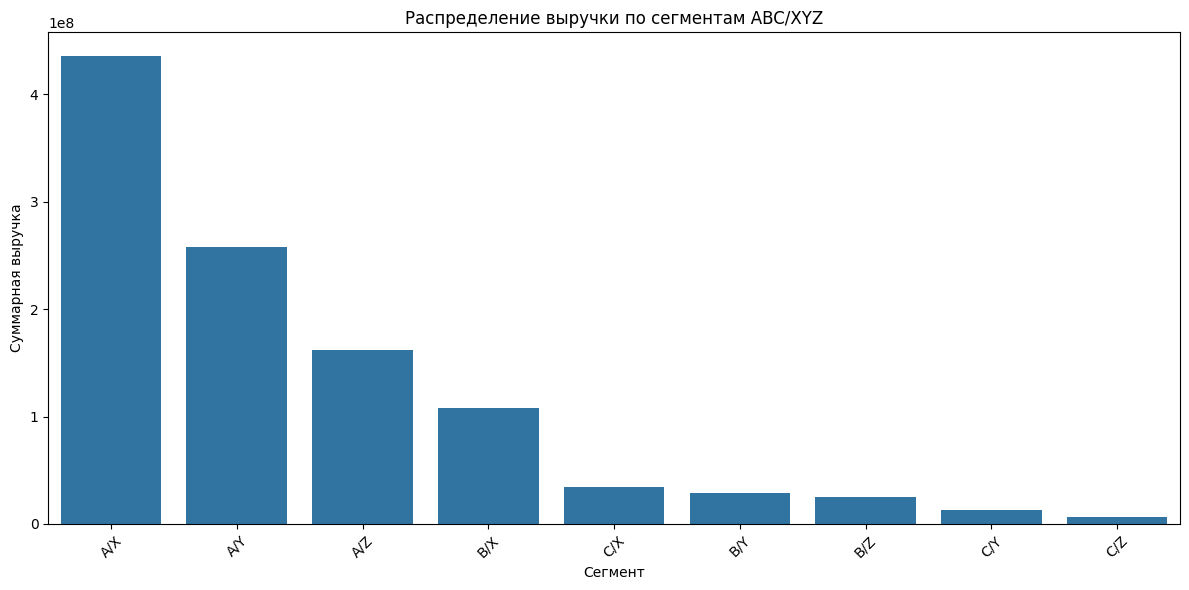

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_group, x='ABC_XYZ', y='Total_Sales_Value')
plt.title('Распределение выручки по сегментам ABC/XYZ')
plt.xlabel('Сегмент')
plt.ylabel('Суммарная выручка')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
